# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [5]:
def max_element(arr):
    zero = arr == 0
    return arr[1:][zero[:-1]].max()
    
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [9]:
def nearest_value(X, v):
    Minus = X - v
    Minus = abs(Minus)
    return (Minus.min()+v)

X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4.0

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [10]:
def scale(X):
    if 0 in np.std(X, axis = 0):
        return 'Плохая матрица'
    Mean = X - np.mean(X, axis = 0)
    Answer = Mean / np.std(X, axis = 0)
    return Answer

X = np.random.randint(1,5,(3,3))
print(X)
scale(X)

[[2 4 4]
 [4 4 2]
 [3 1 1]]


array([[-1.22474487,  0.70710678,  1.33630621],
       [ 1.22474487,  0.70710678, -0.26726124],
       [ 0.        , -1.41421356, -1.06904497]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [12]:
def get_stats(X):
    print('Определитель', np.linalg.det(X))
    print("След", np.trace(X))
    print('Наибольший элемент', np.max(X))
    print("Наименьший элемент", np.min(X))
    print("Норма Фробениуса", np.linalg.norm(X))
    print("Собственные числа", np.linalg.eig(X)[0])
    if np.linalg.det(X) == 0:
        print('Обратной матрицы нет')
    else:
        print("Обратная матрица:")
        print(np.linalg.inv(X))

A = np.random.randn(3, 3) 
print(A)
get_stats(A)

[[-2.18564634 -0.15604247 -1.26155982]
 [ 1.51895103  0.81764034 -0.4579535 ]
 [-0.00648282 -0.37192963  1.5677498 ]]
Определитель -1.3522609432451738
След 0.1997438028474836
Наибольший элемент 1.5677498036697757
Наименьший элемент -2.1856463438014875
Норма Фробениуса 3.4892140760829746
Собственные числа [-2.03283345  0.35412697  1.87845029]
Обратная матрица:
[[-0.8219782  -0.52789148 -0.81564317]
 [ 1.75880725  2.53998691  2.15725522]
 [ 0.41385672  0.6003982   1.14626675]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [15]:
matr_max = []
for exp_num in range(100):
    
    Matr1 = np.random.randn(10, 10)
    Matr2 = np.random.randn(10, 10)
    Max = np.max(Matr1.dot(Matr2))
    matr_max.append(Max)


print("Среднее", np.mean(matr_max))
print("95 квантиль", np.quantile(matr_max, 0.95))

Среднее 8.219876326993694
95 квантиль 11.580950986607922


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [2]:
import pandas as pd
%matplotlib inline
data = pd.read_csv('2008.csv')

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [18]:
data.groupby('CancellationCode').size()

CancellationCode
A    563
B    549
C    299
dtype: int64

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [3]:
print('Среднее', data["Distance"].mean())
print('Минимальное', data["Distance"].min())
print('Максимальное', data["Distance"].max())

Среднее 724.5082571428571
Минимальное 31
Максимальное 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [21]:
data[data["Distance"] == 31][["FlightNum", "DayofMonth", "Month", "Year"]]

,FlightNum,DayofMonth,Month,Year
1116,65,30,12,2008
6958,65,26,12,2008
17349,64,18,8,2008
27534,64,11,3,2008
46082,65,9,8,2008
48112,64,28,2,2008


In [38]:
data[((data["FlightNum"] == 65) | (data["FlightNum"] == 64)) 
      & (data['Distance'] != 31)][["FlightNum", "Distance", "DayofMonth", "Month", "Year"]]

,FlightNum,Distance,DayofMonth,Month,Year
501,64,533,20,3,2008
1389,64,680,13,3,2008
1517,65,680,10,7,2008
2619,64,2381,23,5,2008
3869,64,82,1,7,2008
...,...,...,...,...,...
66529,65,82,21,12,2008
67172,64,533,22,3,2008
68264,65,386,7,9,2008
68338,65,2454,3,8,2008


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [39]:
data.groupby("Origin").size().reset_index(name 
    = 'number_flights').sort_values(by = "number_flights", ascending = False)

,Origin,number_flights
18,ATL,4134
208,ORD,3550
79,DFW,2793
78,DEN,2383
155,LAX,2082
...,...,...
164,LMT,1
168,LWB,1
222,PLN,1
236,RHI,1


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [45]:
data.groupby("Origin")["AirTime"].mean().reset_index(name 
             = 'time').sort_values(by = "time", ascending = False).head()


,Origin,time
262,SJU,205.200000
38,BQN,193.954545
226,PSE,191.875000
272,STT,185.029412
16,ANC,165.415094


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [3]:
data2 = data.groupby("Origin").size().reset_index(name = 'number_flights')
origin_names = list(data2[data2["number_flights"] > 999]["Origin"])
data3 = data[(data["Origin"].isin(origin_names))]
overall_num = data3.groupby("Origin").size().reset_index(name = 'number_flights')
delay_num = data3[data3["DepDelay"] > 0].groupby("Origin").size().reset_index(name = 'number_flights')
delay_num["ratio"] = delay_num["number_flights"] / overall_num["number_flights"]
delay_num.sort_values(by = "ratio", ascending = False).head(1)

,Origin,number_flights,ratio
7,EWR,710,0.511159


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [53]:
data = pd.read_csv('2008.csv')
data.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

In [49]:
data.isnull().sum().sum()

355215

In [50]:
data2 = data.isnull().sum(axis = 1).reset_index(name = "answer")
data2.astype(bool).sum(axis=0)

index     69999
answer    70000
dtype: int64

In [52]:
data2 = data.isnull().sum(axis = 0).reset_index(name = "answer")
data2.astype(bool).sum(axis=0)

index     29
answer    16
dtype: int64

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [60]:
data["DepDelay"].isnull().sum()

1399

**Имеются пропущенные значения в целевой переменной**

In [61]:
data[data['Cancelled'] == 1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [76]:
data5 = data.drop(data.loc[(data['DepDelay'].isnull()) & (data['Cancelled'] == 1)].index)
data5 = data5.drop(data5[data5['DepDelay'] == 0].index)
data5

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [77]:
def time(X):
    hour = []
    minut = []
    for i in X:
        if np.isnan(i):
            hour.append(np.nan)
            minut.append(np.nan)
        else:
            temp = str(int(i))
            hour.append(float(('0'*(4-len(temp)) + temp)[:-2]))
            minut.append(float(('0'*(4-len(temp)) + temp)[-2:]))
    return hour, minut

data5["DepTime_Hour"], data5["DepTime_Minute"] = time(data5["DepTime"])
data5.drop("DepTime", axis = 1, inplace = True)
data5["CRSDepTime_Hour"], data5["CRSDepTime_Minute"] = time(data5["CRSDepTime"])
data5.drop("CRSDepTime", axis = 1, inplace = True)
data5["ArrTime_Hour"], data5["ArrTime_Minute"] = time(data5["ArrTime"])
data5.drop("ArrTime", axis = 1, inplace = True)
data5["CRSArrTime_Hour"], data5["CRSArrTime_Minute"] = time(data5["CRSArrTime"])
data5.drop("CRSArrTime", axis = 1, inplace = True)
data5

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20.0,55.0,23.0,8.0,23.0,0.0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14.0,10.0,17.0,30.0,17.0,28.0
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11.0,45.0,15.0,1.0,15.0,20.0
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11.0,44.0,13.0,23.0,13.0,35.0
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8.0,20.0,12.0,43.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9.0,25.0,11.0,10.0,11.0,18.0
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18.0,40.0,21.0,37.0,21.0,49.0
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11.0,25.0,13.0,36.0,13.0,14.0
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19.0,0.0,22.0,0.0,21.0,39.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [78]:
#!pip install seaborn

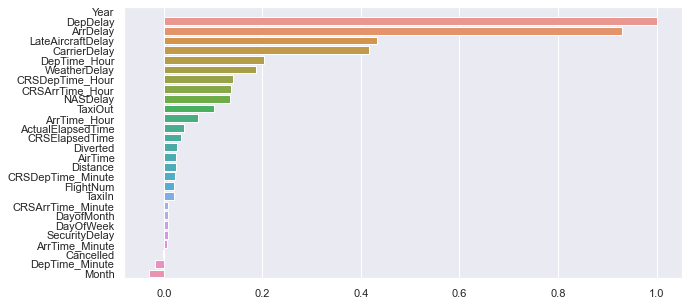

In [82]:
import seaborn as sns
sns.set()

cordata = data5.copy().select_dtypes([np.number])
X = cordata.columns
data6 = data5["DepDelay"]
for i in X:
    cordata[i].fillna(cordata[i].mean(), inplace = True)

corr = {
    feature: np.corrcoef(cordata[feature], data6)[0][1]
    for feature in X
}

sortcorr = sorted(corr.items(), key=lambda x: x[1], reverse=True)
features = [x[0] for x in sortcorr]
corr = [x[1] for x in sortcorr]

plot = sns.barplot(y=features, x=corr)
plot.figure.set_size_inches(10,5)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

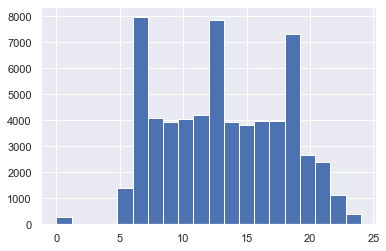

In [84]:
data5['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

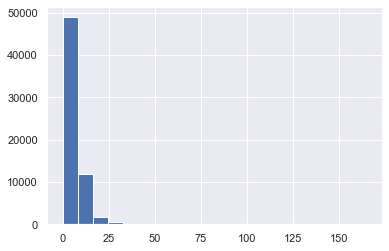

In [85]:
data5['TaxiIn'].hist(bins=20)

<AxesSubplot:>

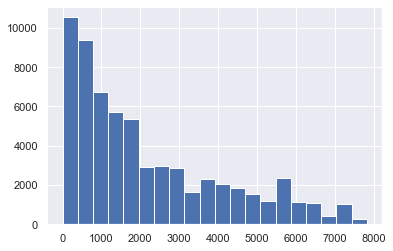

In [86]:
data5['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Из-за разных масштабов мы визуально не можем сравнить данные. После масштабирования проблема будет решена.**

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [87]:
#! pip install StandardScaler

  Created wheel for StandardScaler: filename=StandardScaler-0.5-py3-none-any.whl size=2615 sha256=96c79dea9be6cc6f0c9890325756d082b01077f96c8ee0d226850bc0110b9a27
  Stored in directory: c:\users\юлия\appdata\local\pip\cache\wheels\98\7d\ec\7ea52e96c7cf25f808c75a53cb1db1ef8e7c071debbc983276
Successfully built StandardScaler


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
def transform_data(data):
    cols = data.select_dtypes(np.number).columns
    data[cols] = data[cols].fillna(0)
    scaler = StandardScaler()
    data[cols] = scaler.fit_transform(data[cols])
    
    col = data.select_dtypes(object).columns
    data[col] = data[col].fillna('nan')
    dumms = pd.get_dummies(data[col])
    answer = pd.concat([data, dumms], axis = 1).drop(col, axis = 1)
    return answer

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [91]:
data = transform_data(data5)
print(data.columns.size)

5752


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [119]:
from sklearn.model_selection import train_test_split
data6 = data5["DepDelay"]
X_train, X_test, y_train, y_test = train_test_split(data,
                                    data6, test_size = 0.3, random_state=37)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train,
                                                     y_train, train_size = 1000, random_state = 15)
linreg = LinearRegression().fit(X_train_train, y_train_train)
y_train_train_pred = linreg.predict(X_train_train)

print("MSE подв", mean_squared_error(y_train_train, y_train_train_pred))
print("R^2 подв", linreg.score(X_train_train, y_train_train))

y_test_pred = linreg.predict(X_test)
print("MSE кв", mean_squared_error(y_test, y_test_pred))
print("R^2 кв", linreg.score(X_test, y_test))

MSE подв 4.810789460755327e-27
R^2 подв 1.0
MSE кв 0.00029934460596324605
R^2 кв 0.9997088562560992


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [123]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, cross_val_predict

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [125]:
lasso = Lasso()
lasso = lasso.fit(X_train_train, y_train_train)
ridge = Ridge()
ridge = ridge.fit(X_train_train, y_train_train)

print("Лассо:", np.sum(np.absolute(lasso.coef_) < 10 ** (-3)))
print("Ridge:", np.sum(np.absolute(ridge.coef_) < 10 ** (-3)))

Лассо: 5752
Ridge: 4862


Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Text(0.5, 1.0, 'Ошибки')

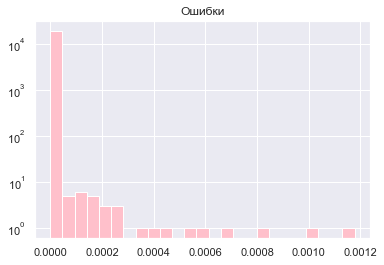

In [127]:
import matplotlib.pyplot as plt
model = Ridge()
y_pred = cross_val_predict(model, X_test, y_test)
error = (y_pred - y_test) ** 2
plt.hist(error, bins = 25, color = 'pink')
plt.yscale("log")
plt.title("Ошибки")